<a href="https://colab.research.google.com/github/notabd7/sales_predictor/blob/main/sales_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies

In [91]:
!pip install matplotlib
!pip install Pandas
!pip install numpy
!pip install seaborn

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 15, in <module>
    from pip._vendor.packaging.requirements import Requirement
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/packaging/requirements.py", line 10, in <module>
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/__init__.py", line 140, in <module>
    

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Collecting Data and Analyzing

In [92]:
#loading test data to Pandas
mart_data = pd.read_csv("/content/Train.csv")


In [93]:
#first 5 rows
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
#number of data points and features
mart_data.shape

(8523, 12)

In [95]:
#getting info about the datasets
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features(Features I am interested in):
1. Item_Identifier
2. Item_Fat_Content
3. Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_Location_Type
7. Outlet_Type

In [96]:
#check for missing values
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean is our average value
Mode is our most repeated value

In [97]:
# mean value of Items Wight colums
mart_data["Item_Weight"].mean()

12.857645184135976

In [98]:
#filling the vaues we are missing in our data
#replacing all missing values with the mean and the inplace stores our missing values to the original data set
mart_data["Item_Weight"].fillna(mart_data["Item_Weight"].mean(), inplace = True)

In [99]:
#recheck for missing values to see if blovk 15 executed as required
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "Outlets_Size" with mode

In [100]:
mode_outlet_size = mart_data.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc=(lambda x:x.mode()[0]))

In [101]:
print(mode_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [102]:
missing_values = mart_data["Outlet_Size"].isnull()

In [103]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [104]:
mart_data.loc[missing_values, 'Outlet_Size'] = mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet_size)

In [105]:
#recheck for missing values to see if blovk 22 executed as required
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [106]:
#some stats for our data
mart_data.describe()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [107]:
sns.set()

<ipython-input-108-ef5b160b5313>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data["Item_Weight"])


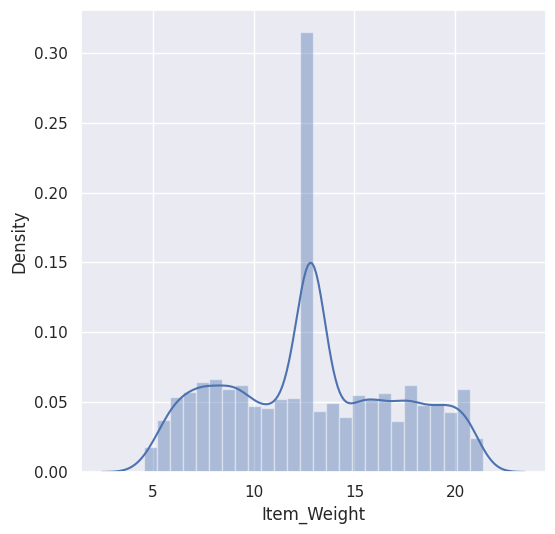

In [108]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_Weight"])
plt.show()

<ipython-input-109-b414564c7821>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data["Item_Visibility"])


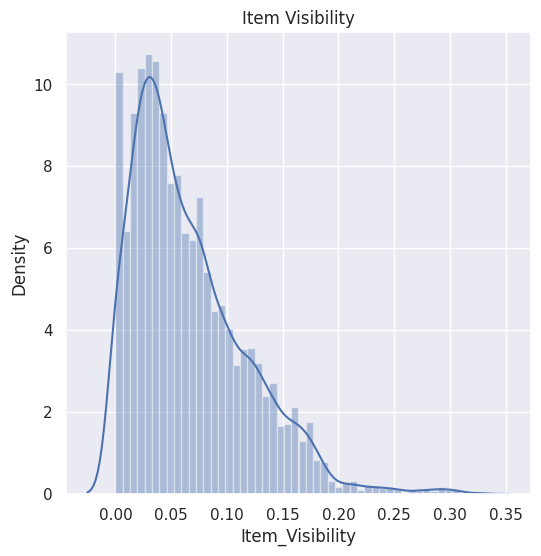

In [109]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_Visibility"])
plt.title('Item Visibility')
plt.show()

<ipython-input-110-5d59b0dc813a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data["Item_MRP"])


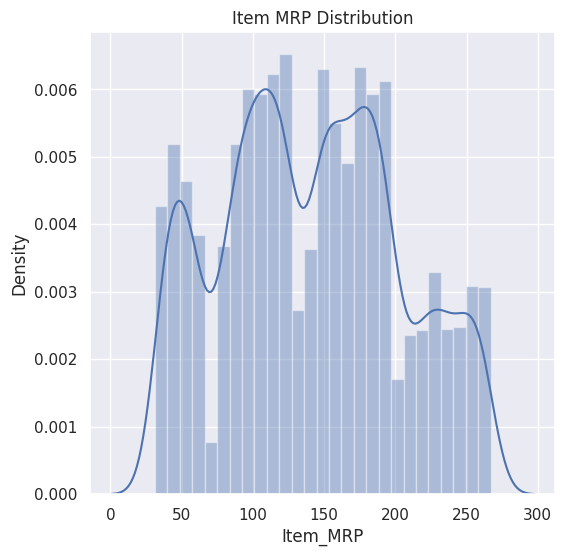

In [110]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_MRP"])
plt.title('Item MRP Distribution')
plt.show()

<ipython-input-111-573154be3467>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data["Item_Outlet_Sales"])


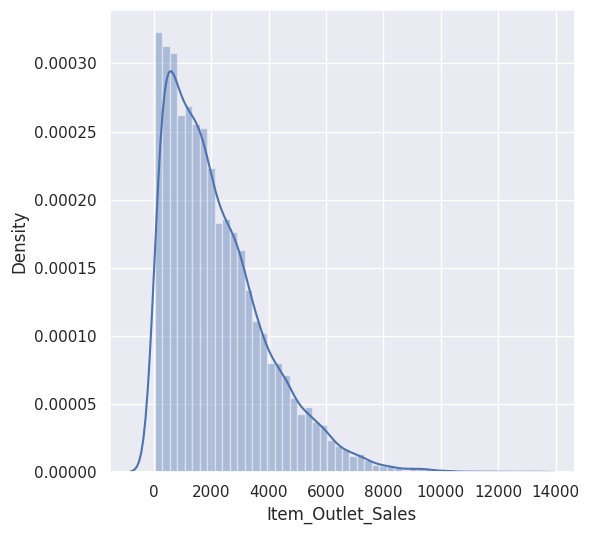

In [111]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_Outlet_Sales"])
plt.show()

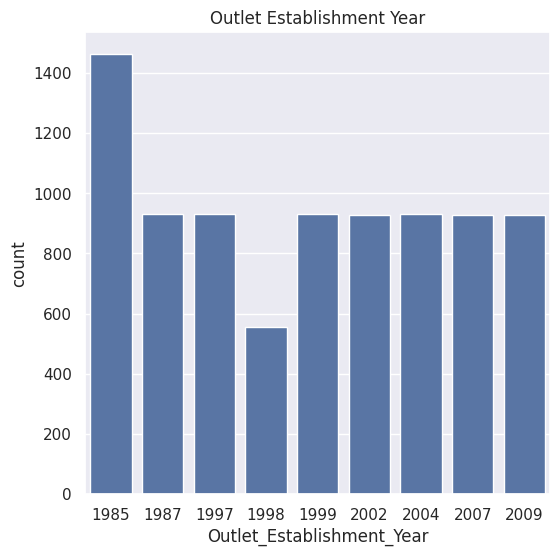

In [112]:
# Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", data=mart_data)
plt.title('Outlet Establishment Year')
plt.show()

  CATEGORICAL FEATURES

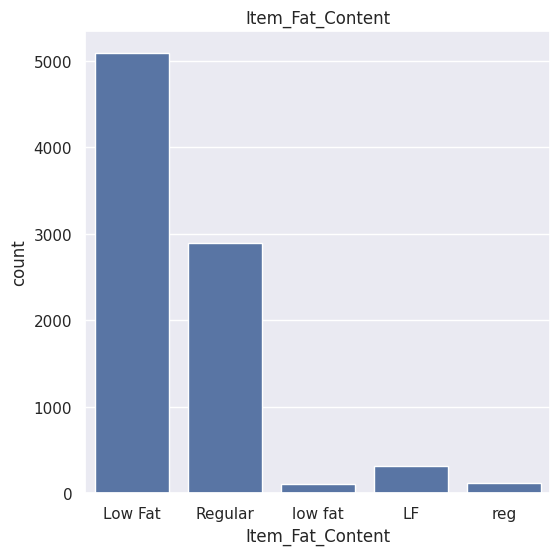

In [113]:
# iTEM_FAT_CONTENT
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data=mart_data)
plt.title('Item_Fat_Content')
plt.show()

In [85]:
mart_data["Item_Type"].dtype

dtype('O')

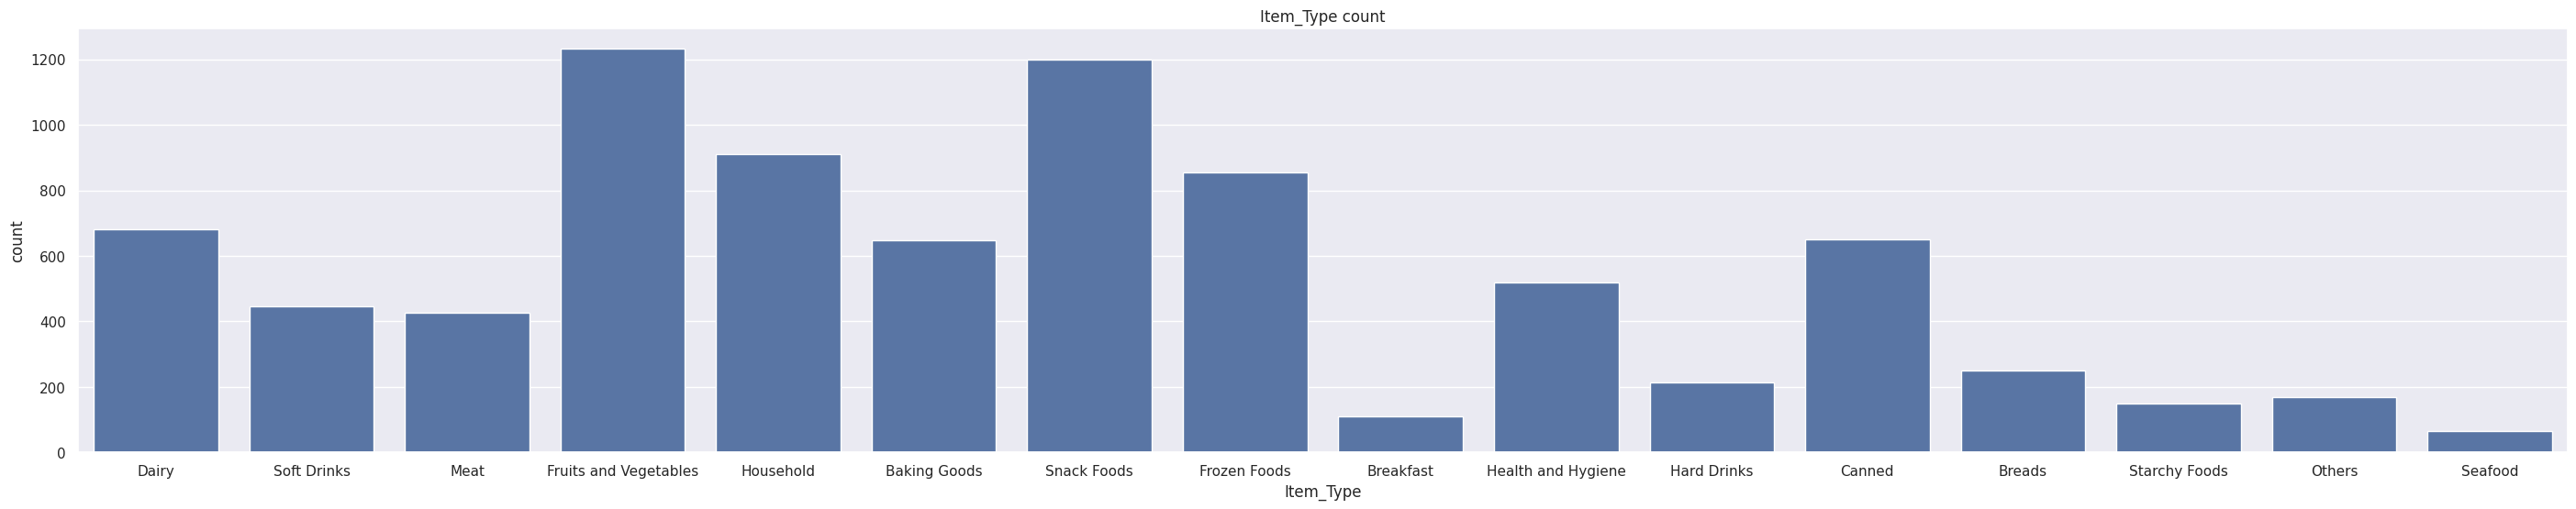

In [114]:
# iTEM_TYPE
plt.figure(figsize=(35,6))
sns.countplot(x="Item_Type", data=mart_data)
plt.title('Item_Type count')
plt.show()

In [ ]:
mart_data["Outlet_Size"].dtype

In [116]:
# outlet_size column not sure why the error is occuring
#plt.figure(figsize=(6 ,6))
#sns.countplot(x="Outlet_Size", data=mart_data)
#plt.show()

Data Before Processing

In [119]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [120]:
mart_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [128]:
mart_data.replace({'Item_Fat_Content': {'low_fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace = True)

In [129]:
mart_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    3006
Low_Fat     316
low fat     112
Name: Item_Fat_Content, dtype: int64

In [130]:
mart_data.replace({'Item_Fat_Content': {'Low_Fat': 'Low Fat', 'low fat': 'Low Fat', 'Low Fat':'Low Fat'}}, inplace = True)

In [131]:
mart_data["Item_Fat_Content"].value_counts() #simplified the data

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [132]:
encoder = LabelEncoder()


In [136]:
mart_data["Item_Identifier"] = encoder.fit_transform(mart_data['Item_Identifier'])
mart_data["Item_Fat_Content"] = encoder.fit_transform(mart_data["Item_Fat_Content"])
mart_data["Item_Type"] = encoder.fit_transform(mart_data['Item_Type'])
mart_data["Outlet_Identifier"] = encoder.fit_transform(mart_data['Outlet_Identifier'])
#mart_data["Outlet_Size"] = encoder.fit_transform(mart_data['Outlet_Size'])
#getting error here again idk why
mart_data["Outlet_Location_Type"] = encoder.fit_transform(mart_data['Outlet_Location_Type'])
mart_data["Outlet_Type"] = encoder.fit_transform(mart_data['Outlet_Type'])

In [137]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052
